In [26]:
import pandas as pd
amazon_dev = pd.read_csv("dev.tsv", sep="\t")
amazon_dev

,idx,text_left,text_right,label
0,0,adobe creative suite cs3 production premium up...,19600061dm adobe creative suite 3 production p...,0
1,1,m-audio pro tools m-powered 7.3 m-audio compat...,make finale 2007 software music production sof...,0
2,2,apple . mac 4.0 online service family pack app...,apple iwork '06 family pack software apple & m...,0
3,3,punch ! master landscape & home design punch !...,punch software 41100 punch ! home design archi...,0
4,4,quickbooks premier non-profit edition 2005 int...,quickbooks ( r ) premier : accountant edition ...,0
...,...,...,...,...
2288,2288,math success deluxe 2007 topics entertainment ...,math success ( tm ) deluxe 2007 49.99,0
2289,2289,adobe cs3 design standard macosx dvd adobe 399.0,adobe creative suite 3 ( cs3 ) design premium ...,0
2290,2290,acrobat professional 8 ( windows ) adobe 273.0,adobe cs3 flash professional academic 239.99,0
2291,2291,mavis beacon typing 17 deluxe by broderbund en...,encore software 10072 mavis beacon typing 17 d...,1


In [27]:
import pandas as pd
amazon_train = pd.read_csv("train.tsv", sep="\t")
amazon_train

,idx,text_left,text_right,label
0,0,microsoft visio standard 2007 version upgrade ...,adobe cs3 design standard upgrade 413.99,0
1,1,microsoft mappoint 2006 with gps microsoft 349.0,microsoft student with encarta premium 2008 co...,0
2,2,adobe after effects professional 7.0 adobe 999.0,adobe flash cs3 professional ( mac ) 699.0,0
3,3,motu digital performer 5 digital audio softwar...,motu digital performer dp5 software music prod...,1
4,4,illustrator cs3 13 mac ed 1u adobe-education-b...,adobe illustrator cs3 for mac academic adobe-e...,1
...,...,...,...,...
6869,6869,microsoft visual studio team suite 2005 with m...,f1q-00302 microsoft visual studio 2005 profess...,0
6870,6870,microsoft word 2004 upgrade ( mac ) microsoft ...,microsoft b21-00806 ae mappoint 2006 cd 50.39,0
6871,6871,adobe after effects professional 7.0 adobe 999.0,15510669dm adobe after effects cs3 professiona...,0
6872,6872,system care professional avanquest 49.95,microsoft office and windows training professi...,0


In [28]:
import pandas as pd
amazon_test = pd.read_csv("test.tsv", sep="\t")
amazon_test

,idx,text_left,text_right,label
0,0,microsoft visual studio test agent 2005 cd 1 p...,individual software professor teaches microsof...,0
1,1,adobe dreamweaver cs3 [ mac ] adobe 399.0,adobe cs3 web premium 1659.99,0
2,2,instant immersion spanish 2.0 topics entertain...,instant immers japanese dlx 2 . 36.11,0
3,3,i transfer dvds 2 ipod edition ( win/mac ) me-...,ghost recon gold edition ( dvd-rom ) 20.95,0
4,4,adobe flash pro cs3 upgrade [ mac ] adobe 199.0,adobe illustrator cs3 ( mac ) 599.0,0
...,...,...,...,...
2288,2288,instant immersion german audio topics entertai...,instant immers french dlx 2 27.57,0
2289,2289,adobe flash pro cs3 [ mac ] adobe 699.0,38039295dm adobe flash cs3 professional v. 9 m...,0
2290,2290,let 's learn about time & date selectsoft publ...,it 's about time products learn the switch to ...,0
2291,2291,quicken legal business pro 2007 nolo press 79.99,quickbooks ( r ) pro 2007 179.99,0


In [30]:
def cp(C,D):
    cend=[]
    a=-1
    b=-1
    m=-1
    n=-1
    target=-1
    if C==''or D=='':
        s=1   
    else:
        for i in range(len(C)):
            t=1
            for j in range(len(D)):
                if C[i]== D[j]:
                    a=i
                    b=j
                    m=a
                    n=b
                while m < len(C) and n<len(D) and C[a:m+1]==D[b:n+1]:
                    m=m+1
                    n=n+1
                long=m-a
                if long >= t:
                    t = long
                    target = m
            
            x=target-1
            y=n-1
            if b <len(D) and C[i]==D[b] :
                cend.append(x)
            else:
                cend.append(i)
        s_AB = len(set(cend))
        z = C.find(D);
        if z!=-1:
            ss=s_AB-1;
        else:
            ss = s_AB
        s=ss/len(C)    
    return s   

In [31]:
def distCPD(C,D):
    s1 = cp(C,D);
    s2 = cp(D,C);
    dist = 0.5*(s1+s2);
    return dist

In [33]:
train_left=amazon_train['text_left']
train_right=amazon_train['text_right']

In [34]:
print(len(train_left))
print(len(train_right))

6874
6874


In [35]:
dist_train=[]
for i in range(len(train_left)):
    d=distCPD(train_left[i],train_right[i])
    dist_train.append(d)
dist_train   

[0.5762096774193548,
 0.5725961538461539,
 0.45833333333333337,
 0.398109243697479,
 0.21410256410256412,
 0.5727013542409123,
 0.5224025974025974,
 0.5352941176470588,
 0.6371086105675147,
 0.4157827065252331,
 0.5037202380952381,
 0.46485478015328763,
 0.41178766588602655,
 0.28782547501759326,
 0.4507692307692308,
 0.30805295091009377,
 0.5944444444444444,
 0.5103046594982079,
 0.49245638849599244,
 0.5069135802469136,
 0.6302592954990216,
 0.4977272727272727,
 0.5690909090909091,
 0.2694327731092437,
 0.47308662741799834,
 0.46818181818181814,
 0.4286792452830189,
 0.21552532833020638,
 0.4060965630114566,
 0.5048531607765057,
 0.275974025974026,
 0.5450819672131147,
 0.6406110615521856,
 0.6552287581699346,
 0.5361344537815126,
 0.5658409387222947,
 0.6228197674418605,
 0.41666666666666663,
 0.38007636237417564,
 0.5488758553274682,
 0.5201620501224797,
 0.4199922510654785,
 0.5883625351503352,
 0.5725806451612903,
 0.4632034632034632,
 0.40588235294117647,
 0.2796817625458996,
 0

In [36]:
truth_train=amazon_train['label']
truth_train

0       0
1       0
2       0
3       1
4       1
       ..
6869    0
6870    0
6871    0
6872    0
6873    0
Name: label, Length: 6874, dtype: int64

In [38]:
is_same=[]
is_diff=[]
for i in range(len(truth_train)):
    if truth_train[i]==1:
        is_same.append(dist_train[i])
    else:
        is_diff.append(dist_train[i])
print(is_same)
#print(is_diff)

[0.398109243697479, 0.21410256410256412, 0.21552532833020638, 0.275974025974026, 0.2796817625458996, 0.14151464897733554, 0.2362155388471178, 0.5573549257759784, 0.20133481646273638, 0.40362399113783826, 0.36917293233082704, 0.26211180124223604, 0.46463272444617176, 0.3951127819548872, 0.20011592522822777, 0.14583333333333334, 0.1971677559912854, 0.049974502804691484, 0.2391222805701425, 0.15391389432485322, 0.3142789373814042, 0.17787114845938373, 0.425, 0.29263746505125815, 0.28027711255559357, 0.325, 0.3111111111111111, 0.20944148936170212, 0.35153181461115474, 0.1636904761904762, 0.039987789987789985, 0.12941176470588237, 0.30921895006402045, 0.36922663802363054, 0.2851662404092072, 0.39849354375896695, 0.22448979591836735, 0.23720095693779905, 0.31680851063829785, 0.3629807692307692, 0.17422408100374204, 0.26840659340659345, 0.13034188034188035, 0.15231343283582088, 0.33491432068543453, 0.3136966126656848, 0.19112318840579712, 0.09235209235209235, 0.39015151515151514, 0.4831768388

In [39]:
import numpy as np
np.mean(is_same)

0.29032493002626925

In [40]:
np.mean(is_diff)

0.4708934026995299

In [41]:
len(is_same)

699

In [43]:
same_train_round=[round(i,2) for i in is_same]
len(same_train_round)

699

In [44]:
diff_train_round=[round(i,2) for i in is_diff]
len(diff_train_round)

6175

In [45]:
def countnum(A,a):
    count=0
    for i in range(len(A)):
        if(A[i]==a):
            count=count+1
    return count 

In [47]:
num_same=[]
for i in range(101):
    num_same.append(countnum(same_train_round,0+0.01*i))
len(num_same)    

101

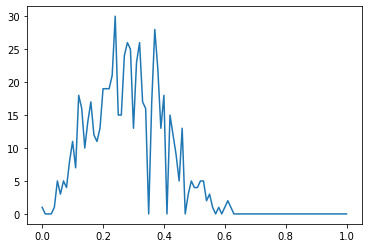

In [52]:
import matplotlib.pyplot as plt
x=np.linspace(0,1,101)
plt.plot(x,num_same)
plt.show()    

In [53]:
num_diff=[]
for i in range(101):
    num_diff.append(countnum(diff_train_round,0+0.01*i))
len(num_diff)  

101

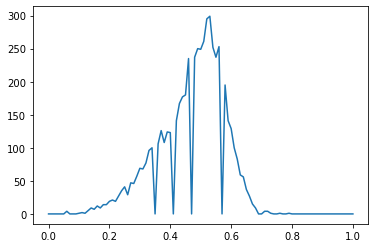

In [54]:
plt.plot(x,num_diff)
plt.show() 

In [55]:
threshold_same=[]
for i in range(len(num_same)):
    if num_same[i]>=(len(is_same)/101):
        threshold_same.append(0+0.01*i)
threshold_same        

[0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.42,
 0.43,
 0.44,
 0.46]

In [72]:
test_left=amazon_test['text_left']
test_right=amazon_test['text_right']

In [73]:
len(test_left)

2293

In [74]:
len(test_right)

2293

In [75]:
dist_test=[]
for i in range(len(test_left)):
    d=distCPD(test_left[i],test_right[i])
    dist_test.append(d)
len(dist_test)    

2293

In [76]:
test_label=amazon_test['label']

In [79]:
acc=[]
for i in range(len(threshold_same)):
    predict=[]
    for j in range(len(dist_test)):
        if dist_test[j]<=threshold_same[i]:
            predict.append(1)
        else:
            predict.append(0)
    count=0        
    for k in range(len(dist_test)):
        if predict[k]==test_label[k]:
            count=count+1
    a=count/len(test_label)
    acc.append(a)   

In [80]:
print(acc)

[0.8992586131705189, 0.8996947230702137, 0.9014391626689926, 0.9036197121674662, 0.9062363715656345, 0.9088530309638029, 0.910161360662887, 0.9110335804622764, 0.9119058002616659, 0.9119058002616659, 0.9136502398604448, 0.9127780200610554, 0.9127780200610554, 0.9114696903619712, 0.9110335804622764, 0.9049280418665504, 0.9062363715656345, 0.9084169210641082, 0.907108591365024, 0.902311382468382, 0.8940252943741823, 0.8896641953772351, 0.88181421718273, 0.8744003488879197, 0.8674225904928042, 0.8569559529001308, 0.8456170955080681, 0.829917139119058, 0.8129088530309638, 0.8011338857392063, 0.7832533798517226, 0.7461840383776712, 0.726122982991714, 0.703881378107283, 0.6580898386393371]


In [81]:
max(acc)

0.9136502398604448

In [83]:
for i in range(len(acc)):
    if acc[i]==max(acc):
        thre=threshold_same[i]
print(thre)        

0.19
